In [4]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd
nltk.download('punkt_tab')
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/zemberek_lem_dataset.csv')

# Download necessary NLTK resources
nltk.download('punkt')

# Tokenize the "Stanza Lemmas" column
tokenized_texts = df['Stanza Lemmas'].apply(lambda x: word_tokenize(x.lower()))

# Create and train the Word2Vec model
model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec_model.model")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x78c0a656b900>
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.1976 - loss: 1.8988 - val_accuracy: 0.5991 - val_loss: 1.0572
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.7158 - loss: 0.8989 - val_accuracy: 0.8073 - val_loss: 0.6197
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.8843 - loss: 0.4079 - val_accuracy: 0.8304 - val_loss: 0.5222
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9534 - loss: 0.2015 - val_accuracy: 0.8524 - val_loss: 0.5596
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.9592 - loss: 0.1382 - val_accuracy: 0.8491 - val_loss: 0.5717
Training CNN + LSTM (Random Initialization)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
CNN + LSTM (Random Initialization) - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       148
           1       0.72      0.84      0.78       127
           2       0.82      0.88      0.85       111
          

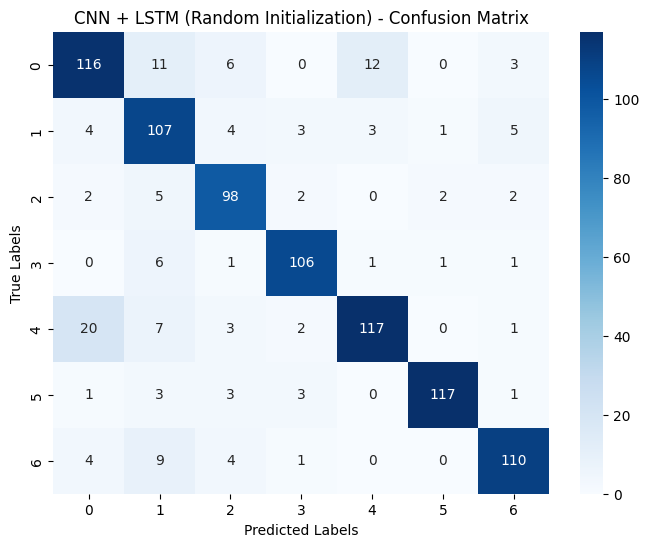

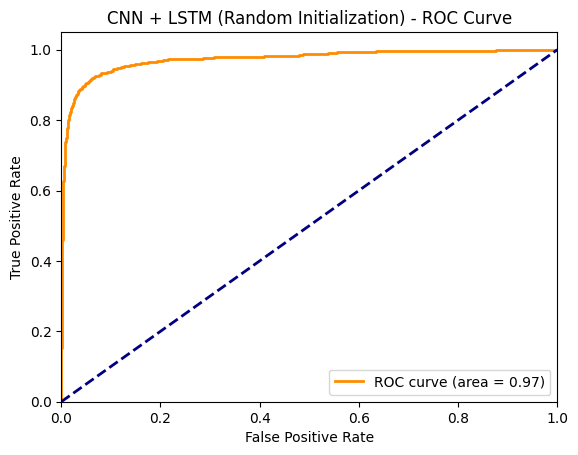

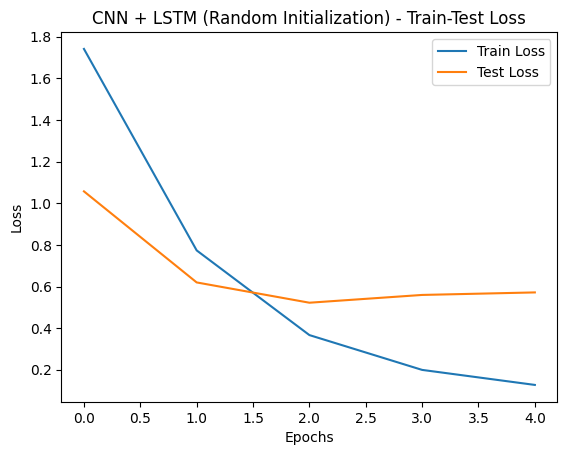

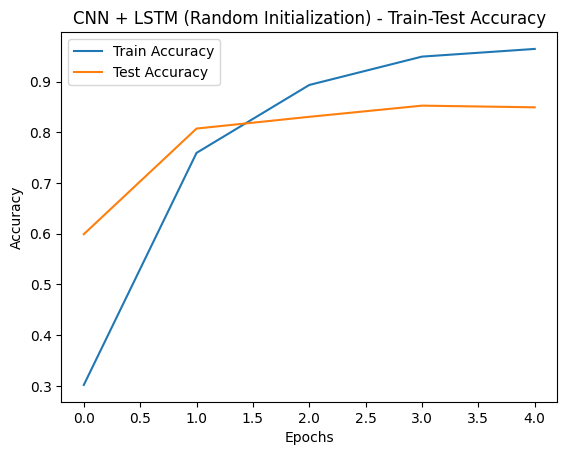

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.3733 - loss: 1.6320 - val_accuracy: 0.6410 - val_loss: 1.0376
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.6163 - loss: 1.0468 - val_accuracy: 0.6883 - val_loss: 0.8959
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.7020 - loss: 0.8651 - val_accuracy: 0.7048 - val_loss: 0.8652
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.7674 - loss: 0.7113 - val_accuracy: 0.7687 - val_loss: 0.6894
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.7931 - loss: 0.6059 - val_accuracy: 0.7676 - val_loss: 0.6873
Training CNN + LSTM (Word2Vec Embedding)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
CNN + LSTM (Word2Vec Embedding) - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.68      0.75       148
           1       0.52      0.85      0.64       127
           2       0.78      0.83      0.80       111
           3       

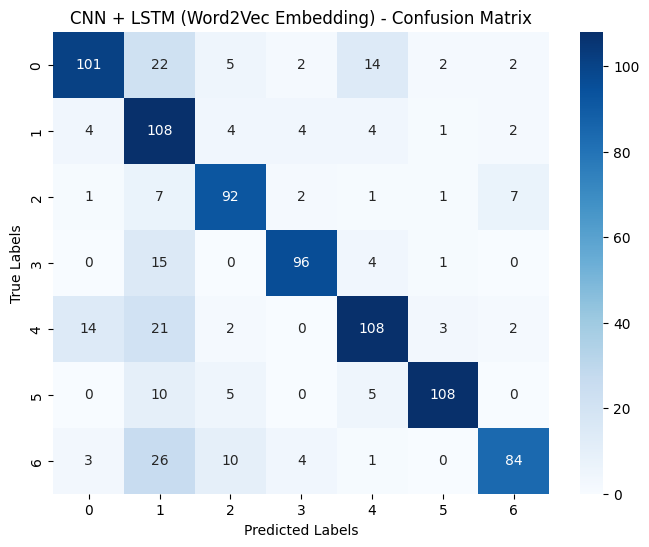

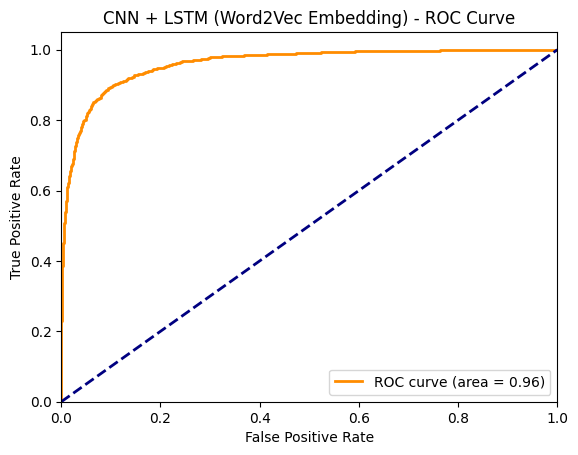

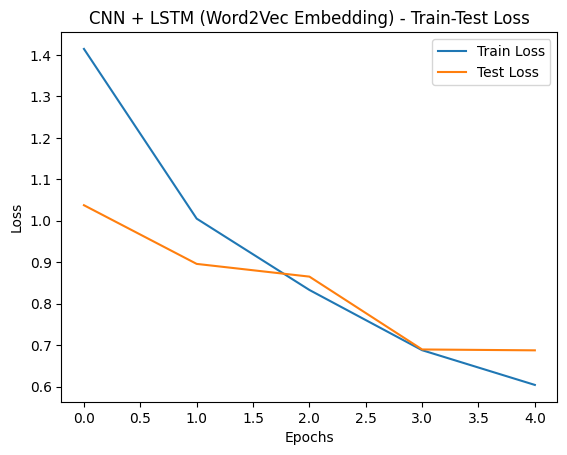

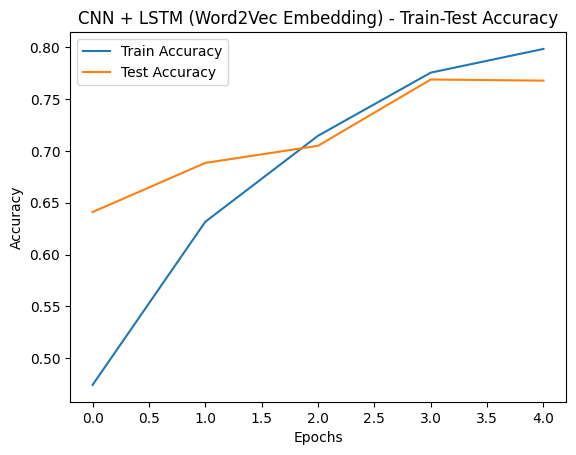

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 1: Random Initialization
def create_cnn_lstm_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Word2Vec Embedding
def create_cnn_lstm_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1: Random Initialization
model_random = create_cnn_lstm_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_random, history_random, "CNN + LSTM (Random Initialization)")

# Model 2: Word2Vec Embedding
model_word2vec = create_cnn_lstm_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_word2vec, history_word2vec, "CNN + LSTM (Word2Vec Embedding)")


In [ ]:
2

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x78c0a074eac0>
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 187ms/step - accuracy: 0.2205 - loss: 1.8772 - val_accuracy: 0.6145 - val_loss: 1.1538
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.6909 - loss: 0.8960 - val_accuracy: 0.8348 - val_loss: 0.5546
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.9065 - loss: 0.3158 - val_accuracy: 0.8513 - val_loss: 0.5000
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.9600 - loss: 0.1415 - val_accuracy: 0.8656 - val_loss: 0.5291
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.9798 - loss: 0.0714 - val_accuracy: 0.8656 - val_loss: 0.5563
Training CNN + BiLSTM (Random Initialization)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step
CNN + BiLSTM (Random Initialization) - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       148
           1       0.76      0.83      0.79       127
           2       0.88      0.85      0.86       111
   

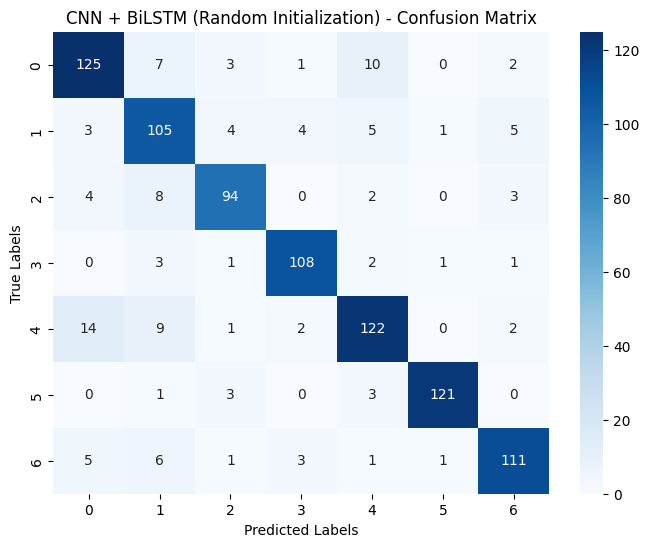

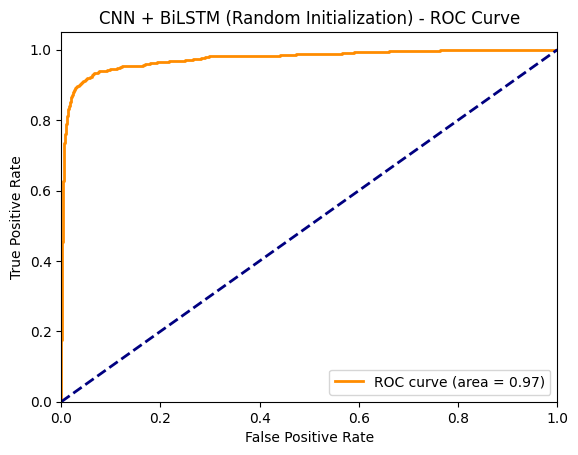

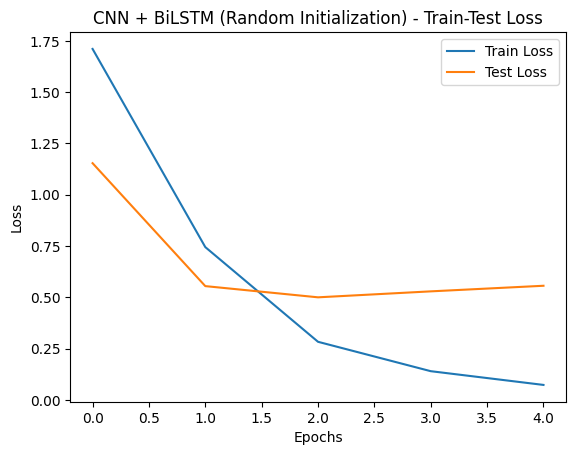

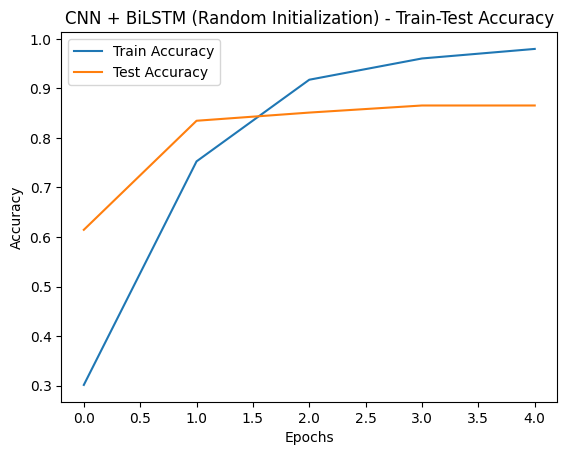

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - accuracy: 0.3811 - loss: 1.6053 - val_accuracy: 0.6443 - val_loss: 0.9871
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.6863 - loss: 0.9061 - val_accuracy: 0.7302 - val_loss: 0.8009
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - accuracy: 0.7417 - loss: 0.7567 - val_accuracy: 0.7599 - val_loss: 0.7315
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 170ms/step - accuracy: 0.7945 - loss: 0.6207 - val_accuracy: 0.7819 - val_loss: 0.6731
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.8357 - loss: 0.4991 - val_accuracy: 0.7952 - val_loss: 0.6319
Training CNN + BiLSTM (Word2Vec Embedding)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step
CNN + BiLSTM (Word2Vec Embedding) - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       148
           1       0.73      0.75      0.74       127
           2       0.72      0.86      0.78       111
          

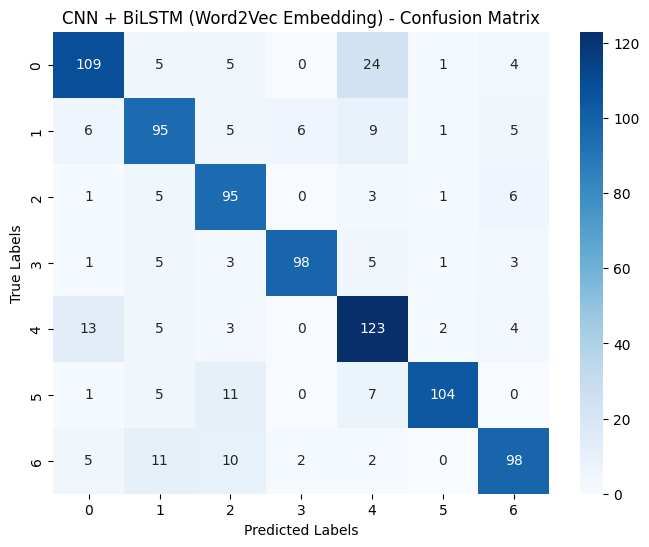

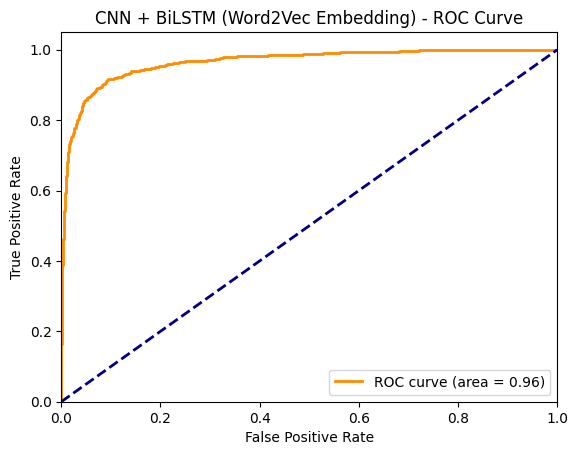

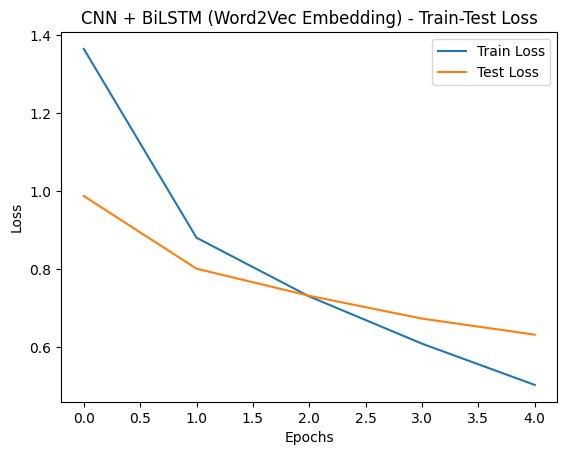

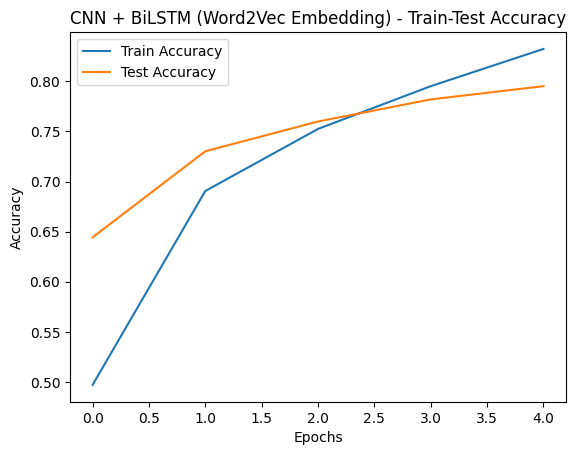

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 1: Random Initialization
def create_cnn_bilstm_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))  # BiLSTM kullanımı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Word2Vec Embedding
def create_cnn_bilstm_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))  # BiLSTM kullanımı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1: Random Initialization
model_random = create_cnn_bilstm_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_random, history_random, "CNN + BiLSTM (Random Initialization)")

# Model 2: Word2Vec Embedding
model_word2vec = create_cnn_bilstm_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_word2vec, history_word2vec, "CNN + BiLSTM (Word2Vec Embedding)")


In [ ]:
3

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x78c0a27e7c80>
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.1940 - loss: 1.9247 - val_accuracy: 0.5617 - val_loss: 1.5983
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.6443 - loss: 1.2521 - val_accuracy: 0.6696 - val_loss: 1.2571
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.8171 - loss: 0.7955 - val_accuracy: 0.7104 - val_loss: 1.0806
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.9197 - loss: 0.4131 - val_accuracy: 0.7203 - val_loss: 0.9572
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.9411 - loss: 0.3728 - val_accuracy: 0.7489 - val_loss: 0.9172
Training CNN + GRU (Random Initialization)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
CNN + GRU (Random Initialization) - Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       148
           1       0.70      0.64      0.67       127
           2       0.72      0.76      0.74       111
           

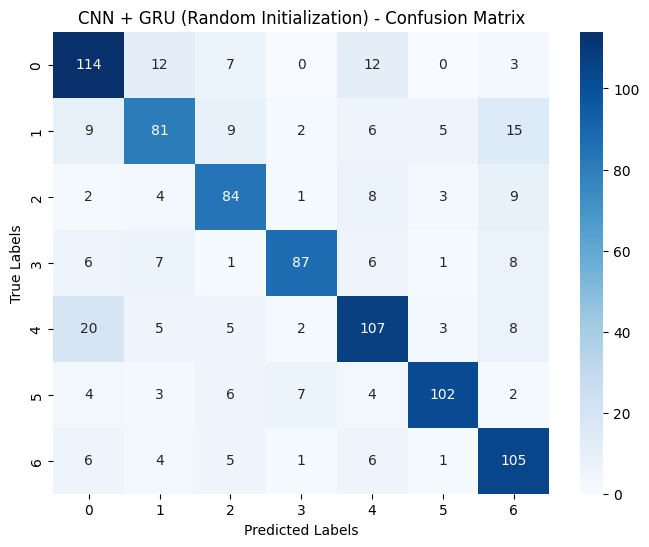

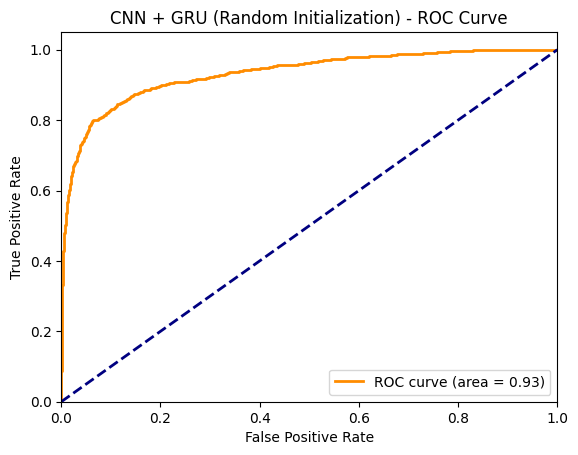

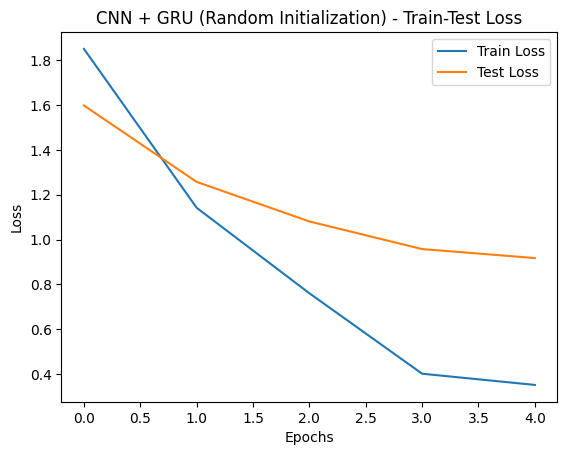

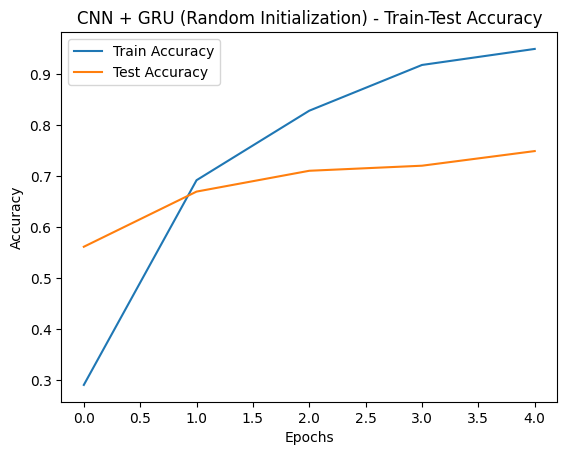

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.1662 - loss: 2.5828 - val_accuracy: 0.2885 - val_loss: 1.7906
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.3267 - loss: 1.7276 - val_accuracy: 0.3778 - val_loss: 1.6423
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.4297 - loss: 1.5959 - val_accuracy: 0.4405 - val_loss: 1.5516
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.4960 - loss: 1.4429 - val_accuracy: 0.4956 - val_loss: 1.4500
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.4910 - loss: 1.5567 - val_accuracy: 0.4769 - val_loss: 1.4874
Training CNN + GRU (Word2Vec Embedding)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
CNN + GRU (Word2Vec Embedding) - Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.34      0.37       148
           1       0.37      0.47      0.41       127
           2       0.53      0.55      0.54       111
           3   

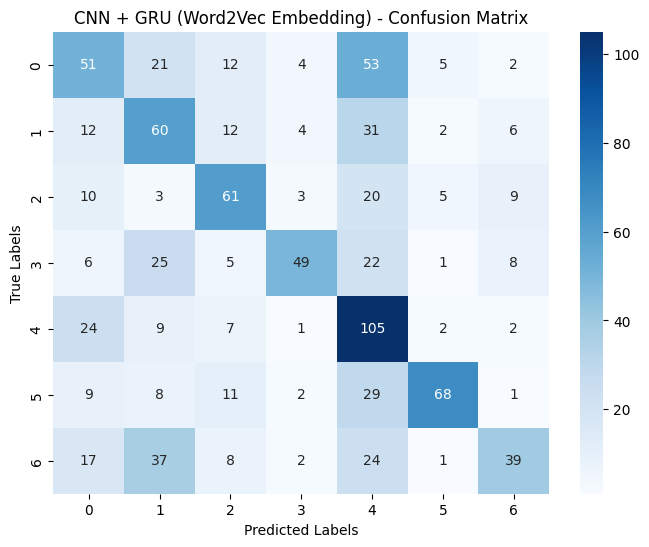

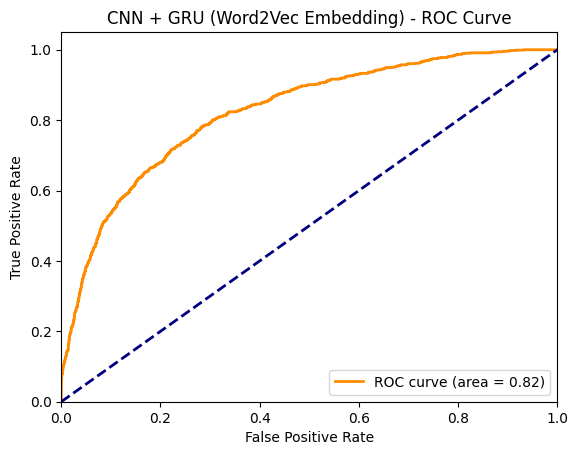

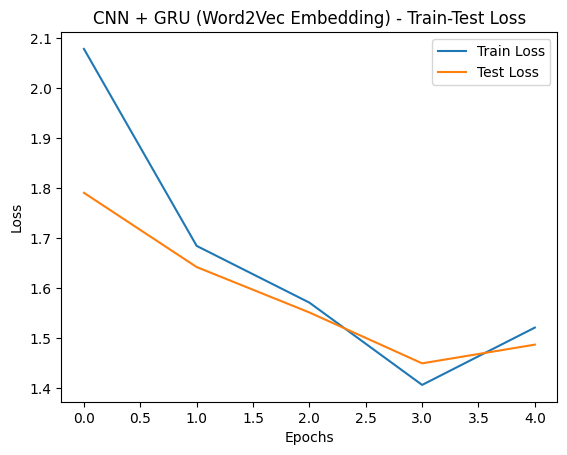

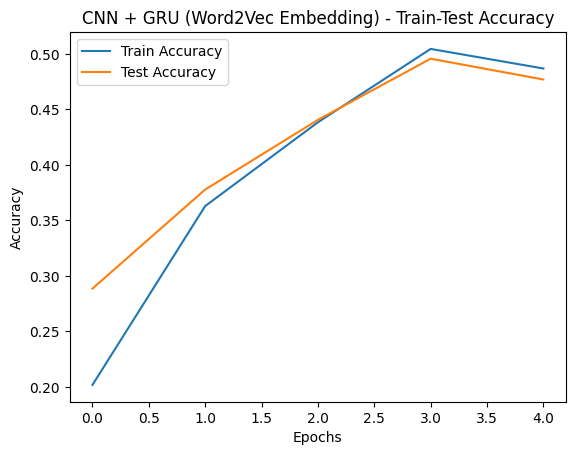

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 1: Random Initialization
def create_cnn_gru_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Word2Vec Embedding
def create_cnn_gru_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1: Random Initialization
model_random = create_cnn_gru_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_random, history_random, "CNN + GRU (Random Initialization)")

# Model 2: Word2Vec Embedding
model_word2vec = create_cnn_gru_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_word2vec, history_word2vec, "CNN + GRU (Word2Vec Embedding)")


In [ ]:
4

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x78c0a81c5840>
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 35s 503ms/step - accuracy: 0.2047 - loss: 1.8934 - val_accuracy: 0.5066 - val_loss: 1.2443
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 514ms/step - accuracy: 0.6022 - loss: 1.0634 - val_accuracy: 0.7037 - val_loss: 0.8733
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 39s 488ms/step - accuracy: 0.7600 - loss: 0.6515 - val_accuracy: 0.7379 - val_loss: 0.7485
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 486ms/step - accuracy: 0.8650 - loss: 0.3932 - val_accuracy: 0.7764 - val_loss: 0.7221
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 490ms/step - accuracy: 0.9154 - loss: 0.2820 - val_accuracy: 0.7808 - val_loss: 0.7039
Training LSTM + BiLSTM (Random Initialization)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step
LSTM + BiLSTM (Random Initialization) - Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       148
           1       0.76      0.65      0.70       127
           2       0.76      0.81      0.78       111

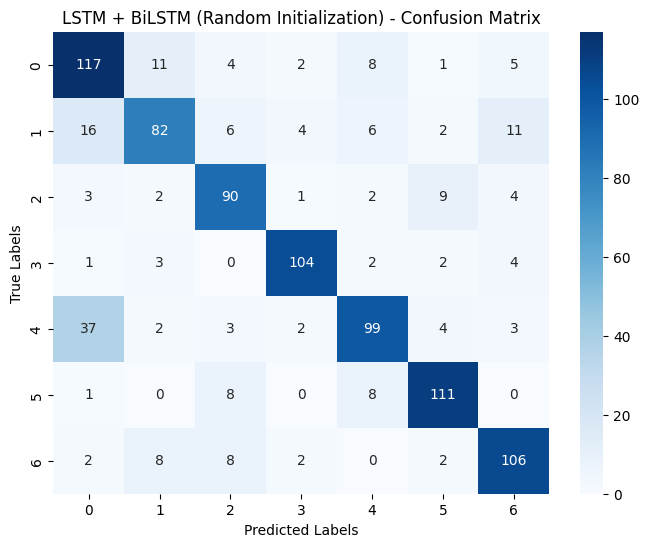

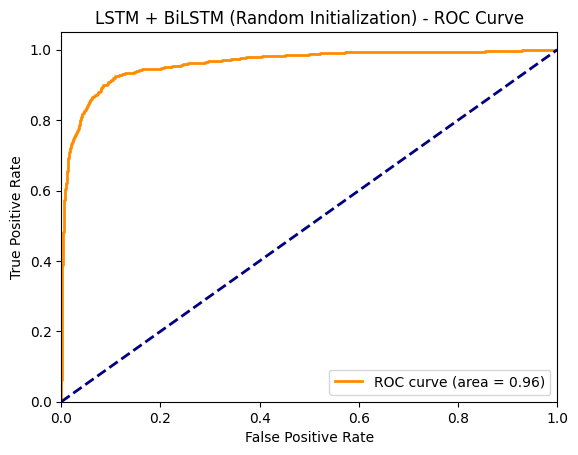

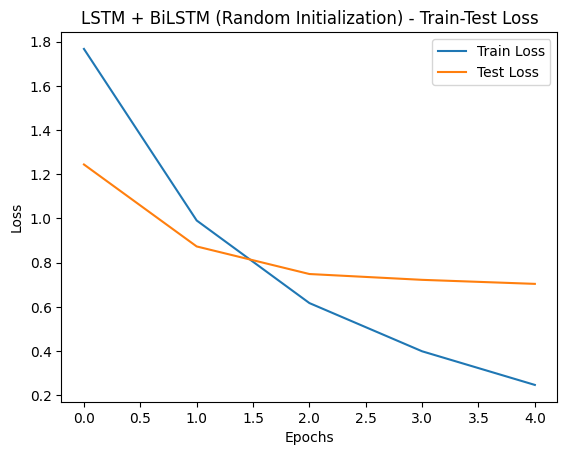

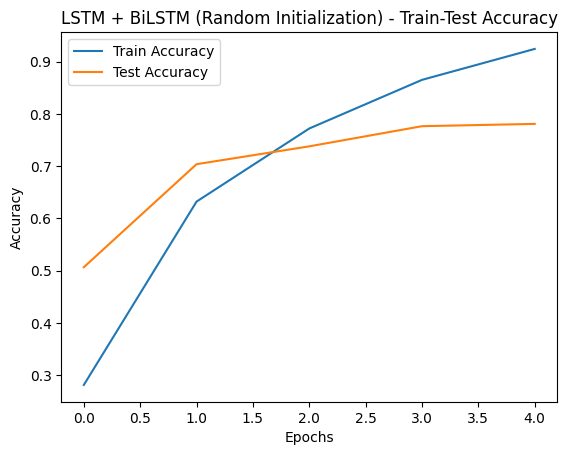

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 35s 502ms/step - accuracy: 0.3255 - loss: 1.7302 - val_accuracy: 0.5980 - val_loss: 1.1329
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 28s 499ms/step - accuracy: 0.6092 - loss: 1.0825 - val_accuracy: 0.6828 - val_loss: 0.9469
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 28s 497ms/step - accuracy: 0.6582 - loss: 0.9645 - val_accuracy: 0.7192 - val_loss: 0.8655
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 28s 488ms/step - accuracy: 0.7243 - loss: 0.8169 - val_accuracy: 0.7665 - val_loss: 0.7199
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 28s 489ms/step - accuracy: 0.7615 - loss: 0.6989 - val_accuracy: 0.7687 - val_loss: 0.7235
Training LSTM + BiLSTM (Word2Vec Embedding)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step
LSTM + BiLSTM (Word2Vec Embedding) - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.60      0.69       148
           1       0.64      0.77      0.70       127
           2       0.75      0.78      0.77       111
     

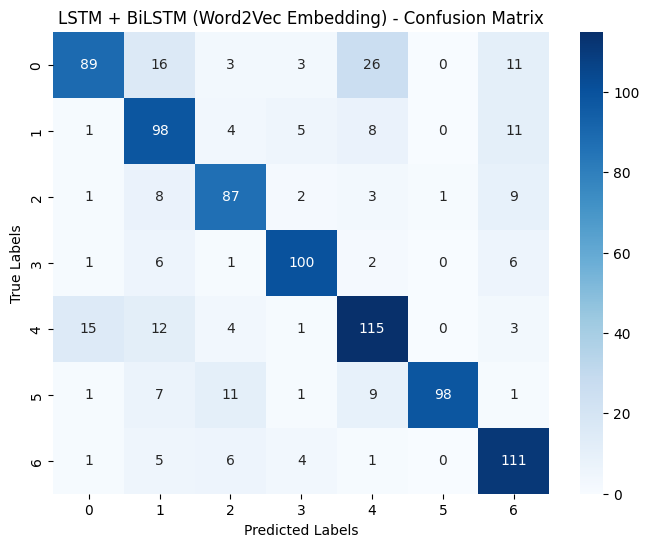

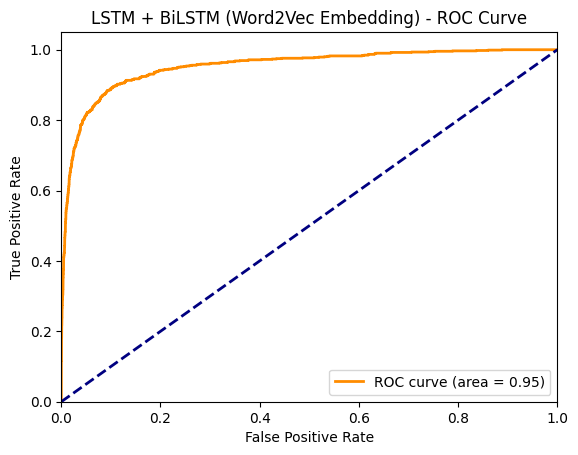

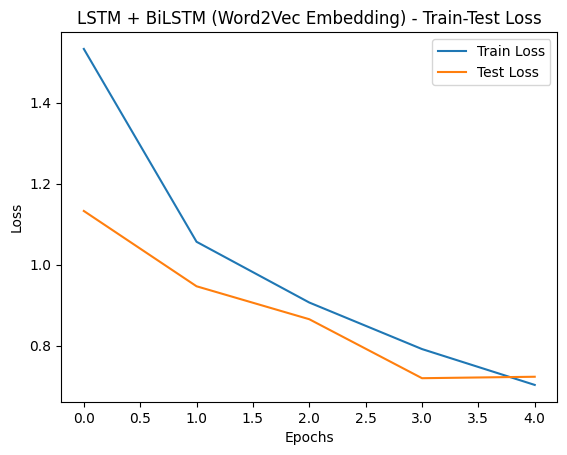

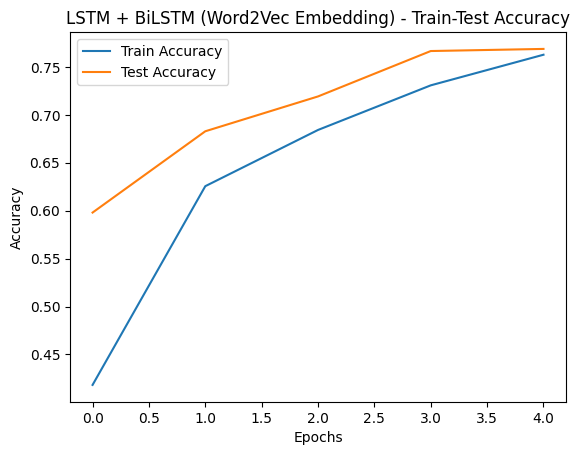

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 1: Random Initialization
def create_lstm_bilstm_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))  # BiLSTM kullanımı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Word2Vec Embedding
def create_lstm_bilstm_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))  # BiLSTM kullanımı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1: Random Initialization
model_random = create_lstm_bilstm_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_random, history_random, "LSTM + BiLSTM (Random Initialization)")

# Model 2: Word2Vec Embedding
model_word2vec = create_lstm_bilstm_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_word2vec, history_word2vec, "LSTM + BiLSTM (Word2Vec Embedding)")


In [ ]:
5

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x78c0a8895840>
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 28s 412ms/step - accuracy: 0.2064 - loss: 1.9061 - val_accuracy: 0.5352 - val_loss: 1.5920
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 379ms/step - accuracy: 0.5486 - loss: 19.4970 - val_accuracy: 0.5903 - val_loss: 1.4583
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 43s 416ms/step - accuracy: 0.6449 - loss: 1.8276 - val_accuracy: 0.6410 - val_loss: 1.3697
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 409ms/step - accuracy: 0.7244 - loss: 1.1234 - val_accuracy: 0.6828 - val_loss: 1.2681
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 407ms/step - accuracy: 0.7768 - loss: 1.2879 - val_accuracy: 0.7070 - val_loss: 1.2149
Training LSTM + GRU (Random Initialization)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step
LSTM + GRU (Random Initialization) - Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       148
           1       0.51      0.63      0.56       127
           2       0.82      0.54      0.65       111
     

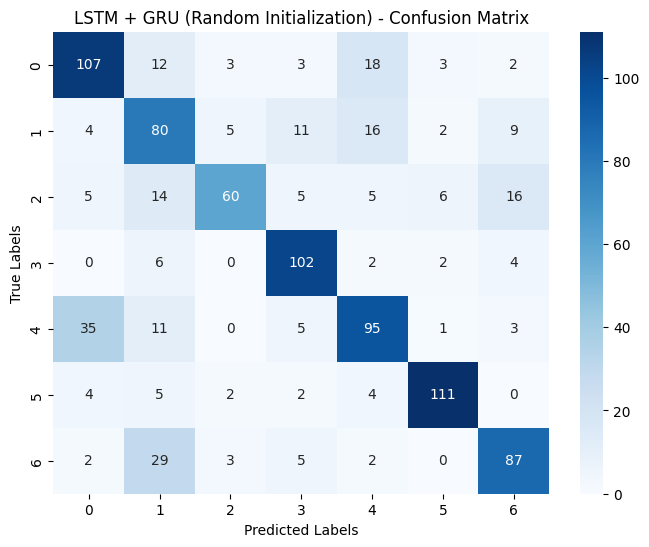

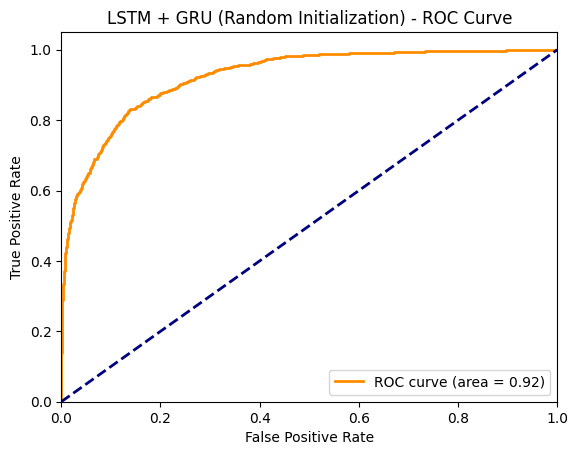

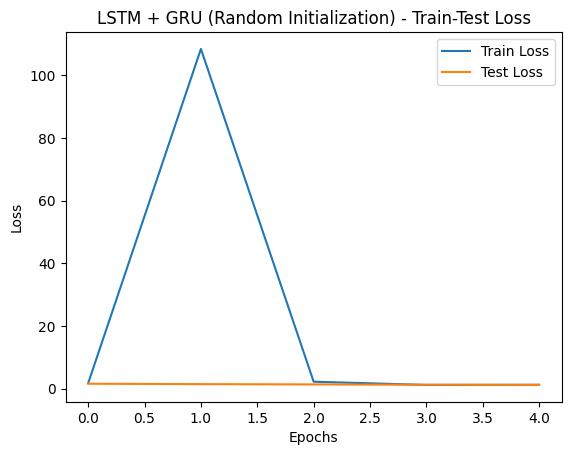

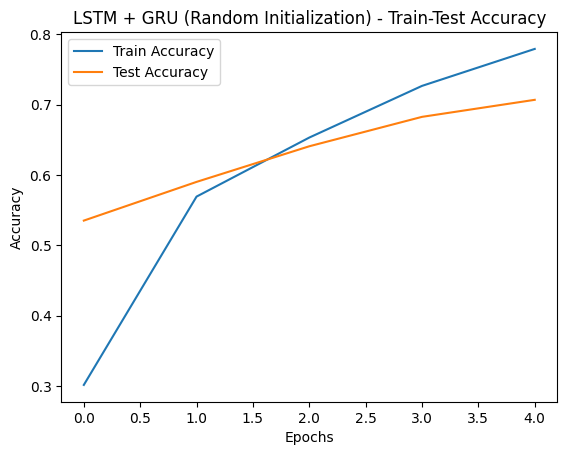

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 28s 426ms/step - accuracy: 0.2617 - loss: 5.1284 - val_accuracy: 0.4031 - val_loss: 1.7220
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 417ms/step - accuracy: 0.3683 - loss: 2.4153 - val_accuracy: 0.4262 - val_loss: 1.6840
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 415ms/step - accuracy: 0.3487 - loss: 1.7128 - val_accuracy: 0.4042 - val_loss: 1.7325
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 40s 398ms/step - accuracy: 0.4043 - loss: 1.6775 - val_accuracy: 0.4758 - val_loss: 1.6902
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 410ms/step - accuracy: 0.4149 - loss: 1.6838 - val_accuracy: 0.4945 - val_loss: 1.6655
Training LSTM + GRU (Word2Vec Embedding)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step
LSTM + GRU (Word2Vec Embedding) - Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.49      0.54       148
           1       0.43      0.44      0.44       127
           2       0.72      0.21      0.32       111
           

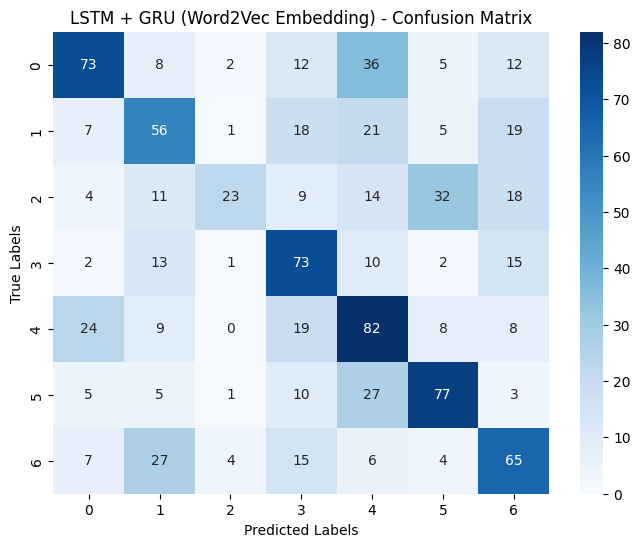

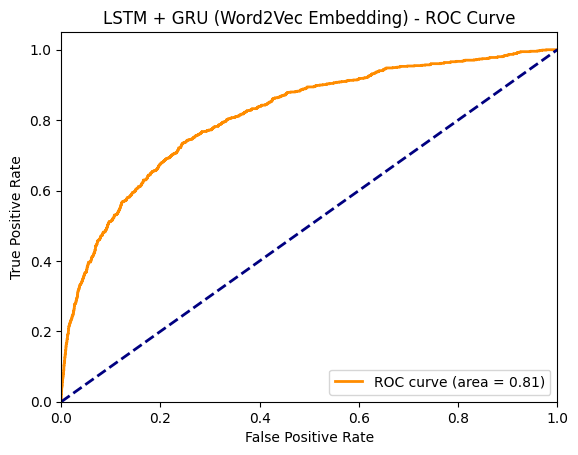

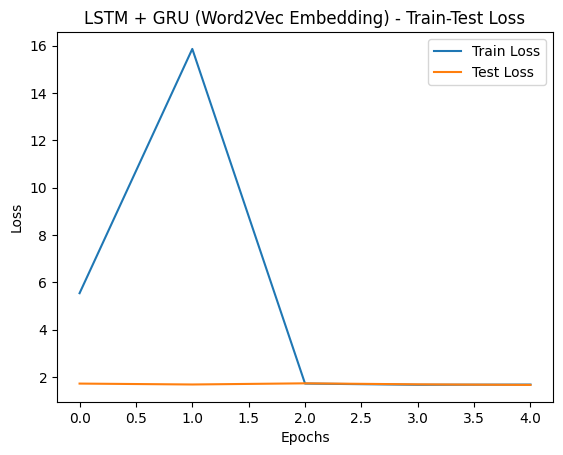

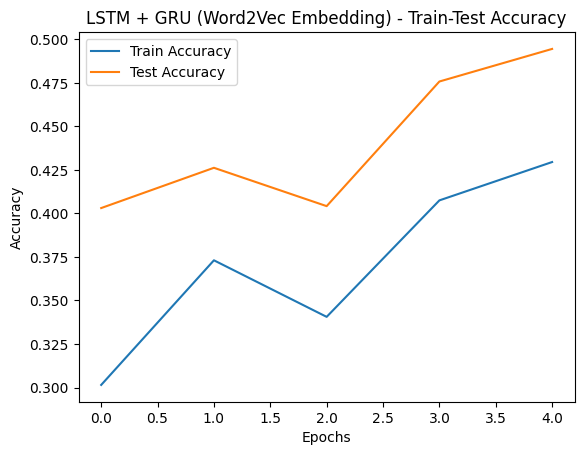

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 1: Random Initialization
def create_lstm_gru_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Word2Vec Embedding
def create_lstm_gru_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1: Random Initialization
model_random = create_lstm_gru_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_random, history_random, "LSTM + GRU (Random Initialization)")

# Model 2: Word2Vec Embedding
model_word2vec = create_lstm_gru_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_word2vec, history_word2vec, "LSTM + GRU (Word2Vec Embedding)")


In [ ]:
6

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x78c0a05404c0>
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 38s 574ms/step - accuracy: 0.1901 - loss: 1.9952 - val_accuracy: 0.3877 - val_loss: 1.8059
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 536ms/step - accuracy: 0.4721 - loss: 16.3438 - val_accuracy: 0.4504 - val_loss: 1.7320
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 540ms/step - accuracy: 0.5515 - loss: 12.6049 - val_accuracy: 0.5441 - val_loss: 1.6284
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 537ms/step - accuracy: 0.6612 - loss: 1.3867 - val_accuracy: 0.5914 - val_loss: 1.4976
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 43s 568ms/step - accuracy: 0.7163 - loss: 1.1634 - val_accuracy: 0.6178 - val_loss: 1.3693
Training BiLSTM + GRU (Random Initialization)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step
BiLSTM + GRU (Random Initialization) - Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.74      0.63       148
           1       0.49      0.51      0.50       127
           2       0.68      0.77      0.72       111

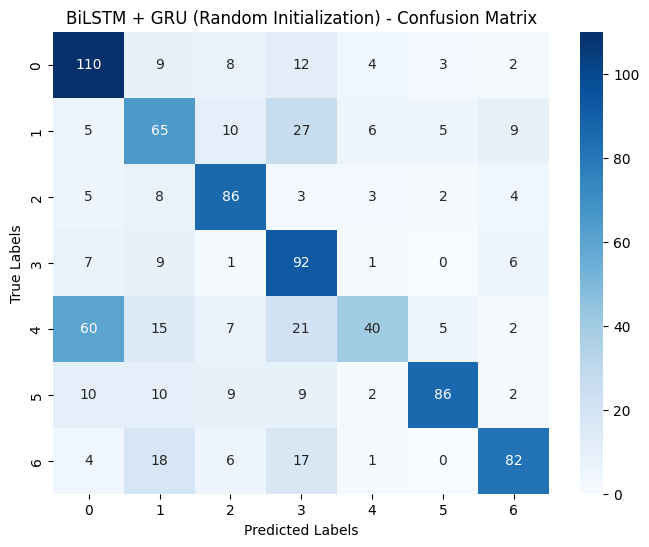

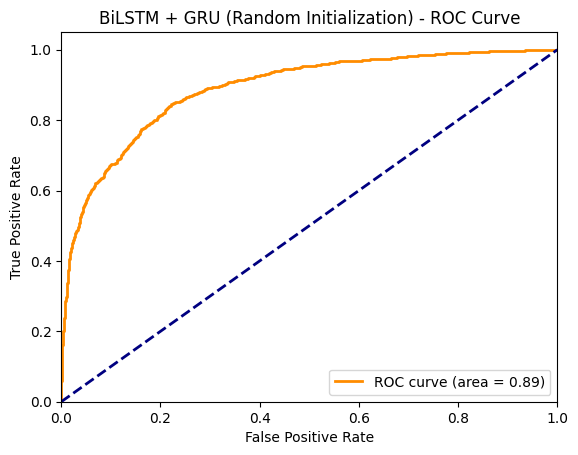

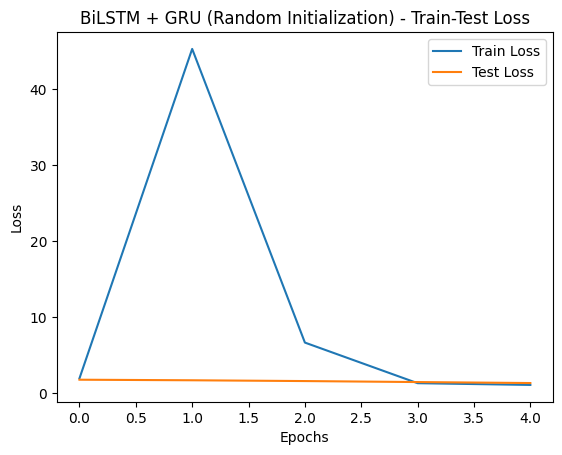

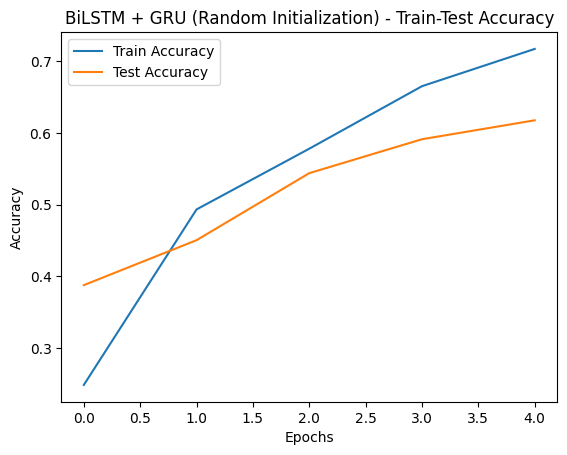

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 39s 558ms/step - accuracy: 0.2045 - loss: 4.2790 - val_accuracy: 0.3535 - val_loss: 1.7876
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 546ms/step - accuracy: 0.3211 - loss: 1.7884 - val_accuracy: 0.2797 - val_loss: 1.8443
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 551ms/step - accuracy: 0.2906 - loss: 1.7978 - val_accuracy: 0.3667 - val_loss: 1.7498
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 42s 570ms/step - accuracy: 0.3313 - loss: 14.6456 - val_accuracy: 0.2963 - val_loss: 1.8386
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 573ms/step - accuracy: 0.2827 - loss: 1.8499 - val_accuracy: 0.3117 - val_loss: 1.8139
Training BiLSTM + GRU (Word2Vec Embedding)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step
BiLSTM + GRU (Word2Vec Embedding) - Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.31      0.37       148
           1       0.23      0.55      0.33       127
           2       0.47      0.31      0.37       111
      

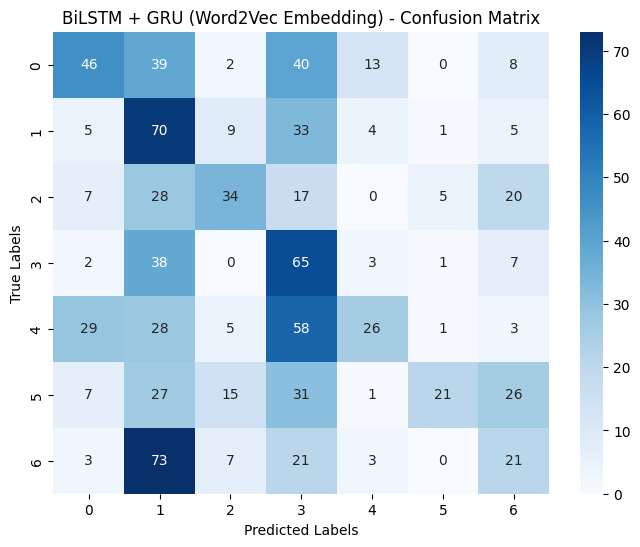

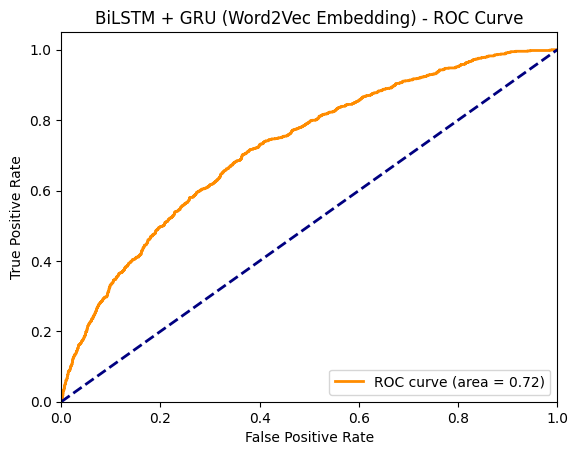

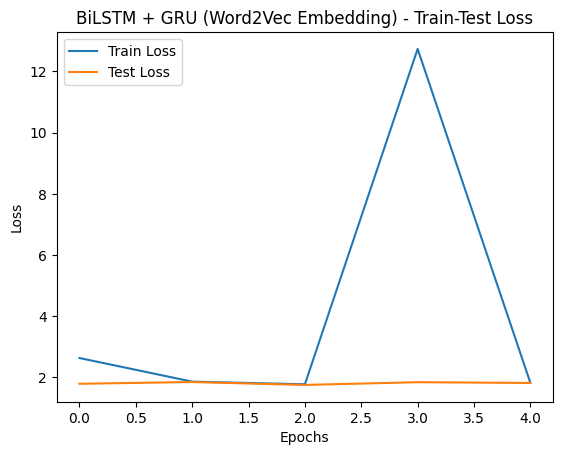

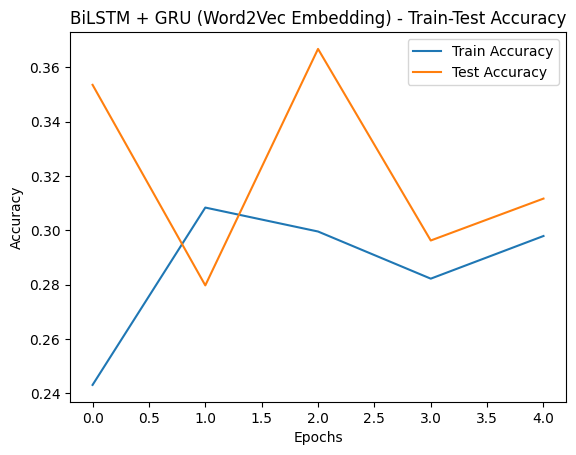

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 1: Random Initialization
def create_bilstm_gru_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Word2Vec Embedding
def create_bilstm_gru_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1: Random Initialization
model_random = create_bilstm_gru_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_random, history_random, "BiLSTM + GRU (Random Initialization)")

# Model 2: Word2Vec Embedding
model_word2vec = create_bilstm_gru_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_word2vec, history_word2vec, "BiLSTM + GRU (Word2Vec Embedding)")


In [ ]:
7

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x78c0700e50c0>
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 264ms/step - accuracy: 0.2156 - loss: 1.8768 - val_accuracy: 0.5430 - val_loss: 1.1587
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 242ms/step - accuracy: 0.6892 - loss: 0.8937 - val_accuracy: 0.8029 - val_loss: 0.6030
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 242ms/step - accuracy: 0.8897 - loss: 0.3667 - val_accuracy: 0.8238 - val_loss: 0.5839
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 244ms/step - accuracy: 0.9543 - loss: 0.1750 - val_accuracy: 0.8381 - val_loss: 0.5879
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 242ms/step - accuracy: 0.9726 - loss: 0.0967 - val_accuracy: 0.8315 - val_loss: 0.6833
Training CNN + LSTM + BiLSTM (Random Initialization)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
CNN + LSTM + BiLSTM (Random Initialization) - Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       148
           1       0.76      0.81      0.79       127
           2       0.83      0.86      0.8

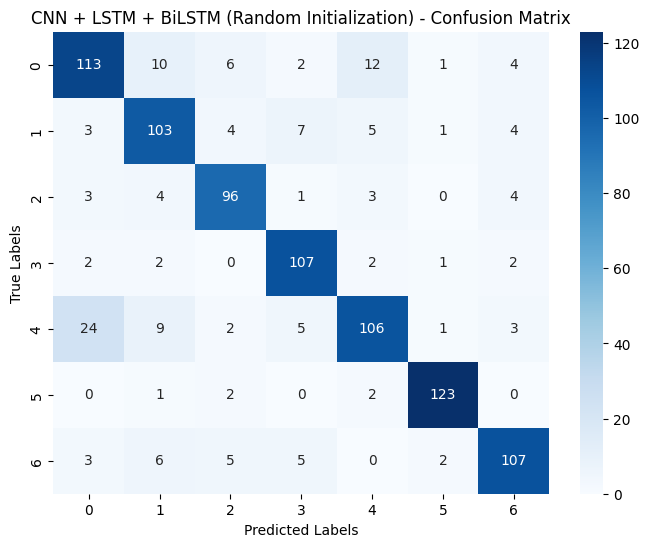

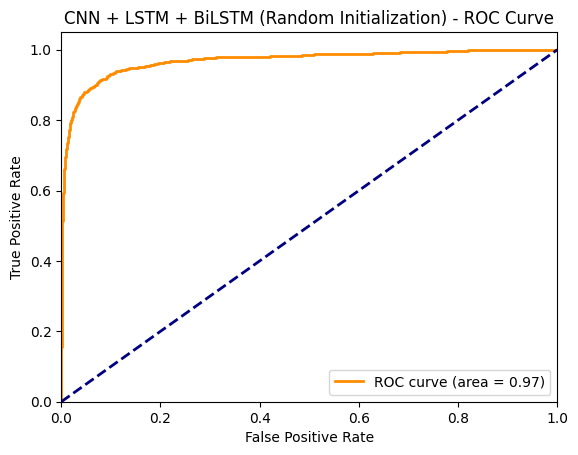

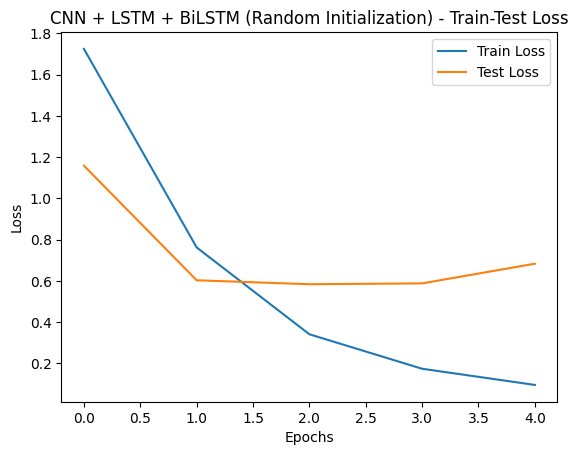

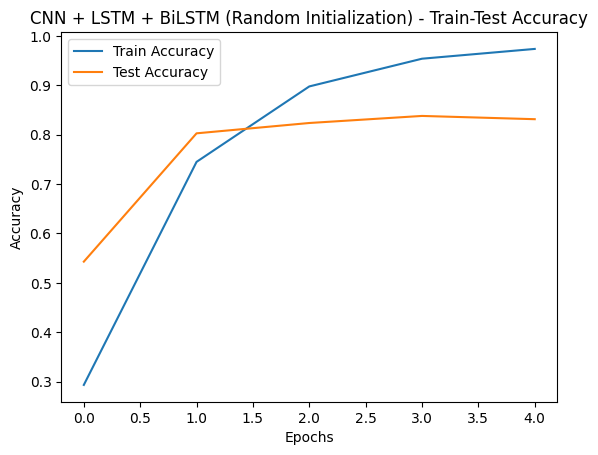

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 259ms/step - accuracy: 0.3574 - loss: 1.6497 - val_accuracy: 0.6278 - val_loss: 1.0521
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 242ms/step - accuracy: 0.6303 - loss: 1.0329 - val_accuracy: 0.7313 - val_loss: 0.8186
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 244ms/step - accuracy: 0.7395 - loss: 0.7698 - val_accuracy: 0.7478 - val_loss: 0.7572
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 243ms/step - accuracy: 0.7853 - loss: 0.6601 - val_accuracy: 0.7654 - val_loss: 0.7306
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 247ms/step - accuracy: 0.8205 - loss: 0.5423 - val_accuracy: 0.7863 - val_loss: 0.6635
Training CNN + LSTM + BiLSTM (Word2Vec Embedding)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step
CNN + LSTM + BiLSTM (Word2Vec Embedding) - Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       148
           1       0.71      0.80      0.76       127
           2       0.75      0.77      0.76     

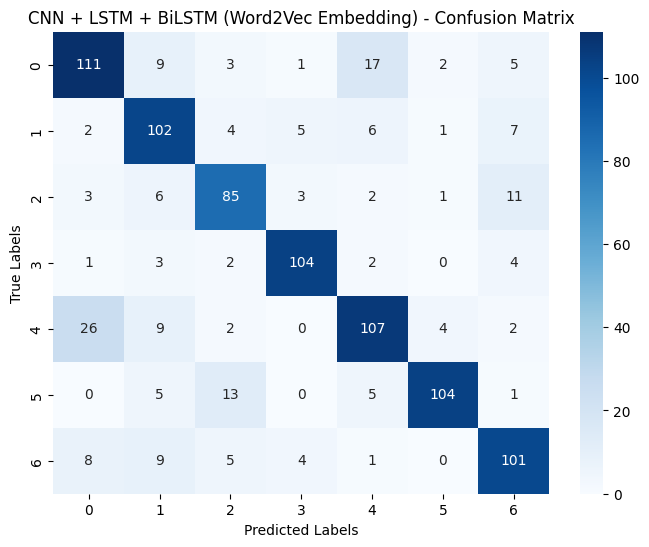

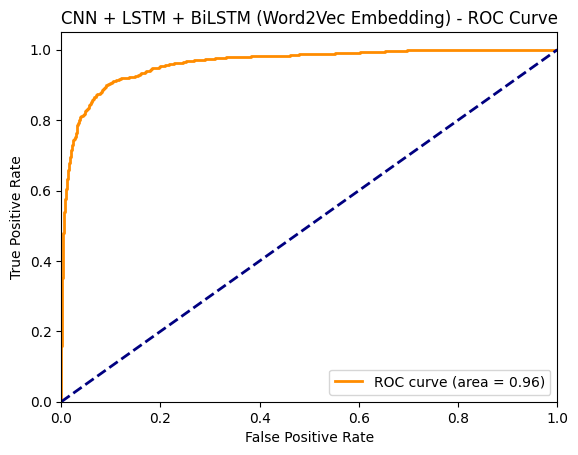

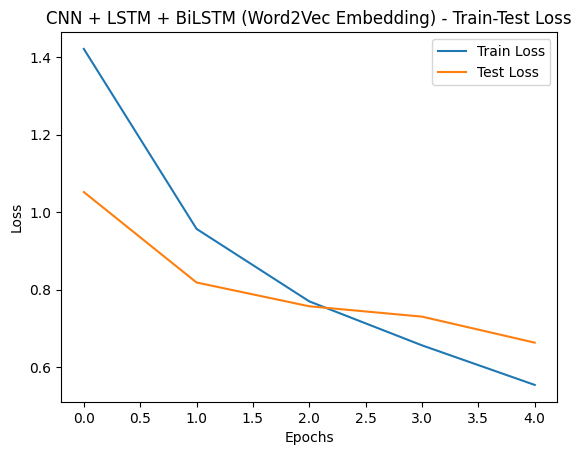

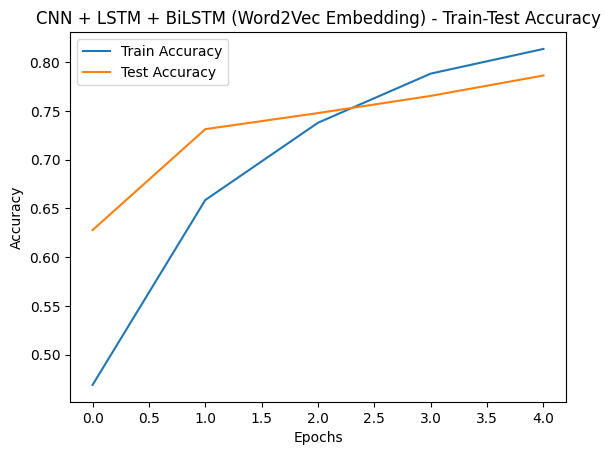

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 1: Random Initialization
def create_cnn_lstm_bilstm_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))  # BiLSTM katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Word2Vec Embedding
def create_cnn_lstm_bilstm_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))  # BiLSTM katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1: Random Initialization
model_random = create_cnn_lstm_bilstm_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_random, history_random, "CNN + LSTM + BiLSTM (Random Initialization)")

# Model 2: Word2Vec Embedding
model_word2vec = create_cnn_lstm_bilstm_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_word2vec, history_word2vec, "CNN + LSTM + BiLSTM (Word2Vec Embedding)")


In [ ]:
8

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x78c0a3bdb900>
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 197ms/step - accuracy: 0.2112 - loss: 1.8863 - val_accuracy: 0.5606 - val_loss: 1.2961
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.6272 - loss: 1.3236 - val_accuracy: 0.6773 - val_loss: 1.2684
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 204ms/step - accuracy: 0.7687 - loss: 0.8917 - val_accuracy: 0.6949 - val_loss: 1.0572
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 205ms/step - accuracy: 0.8205 - loss: 0.6217 - val_accuracy: 0.8128 - val_loss: 0.7033
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.9471 - loss: 0.3552 - val_accuracy: 0.7665 - val_loss: 0.8012
Training CNN + LSTM + GRU (Random Initialization)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step
CNN + LSTM + GRU (Random Initialization) - Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.76       148
           1       0.97      0.22      0.36       127
           2       0.83      0.77      0.80     

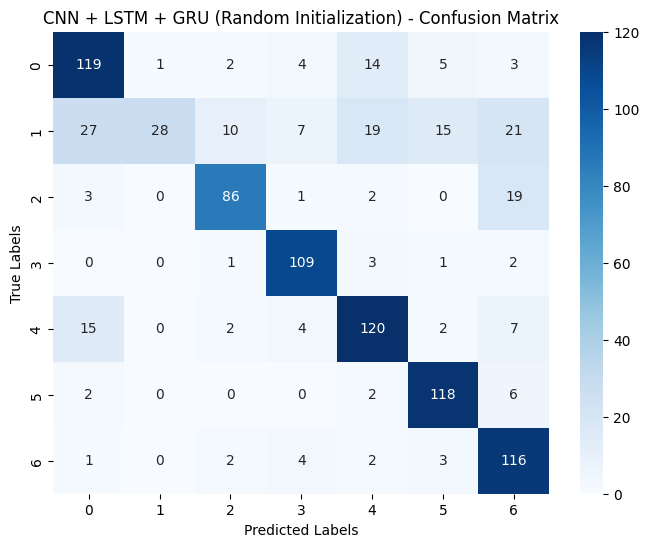

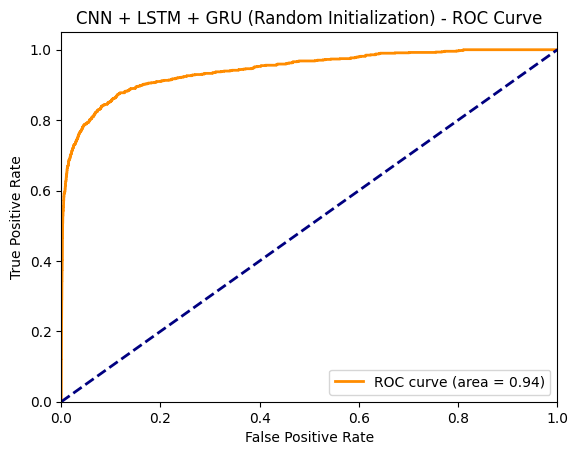

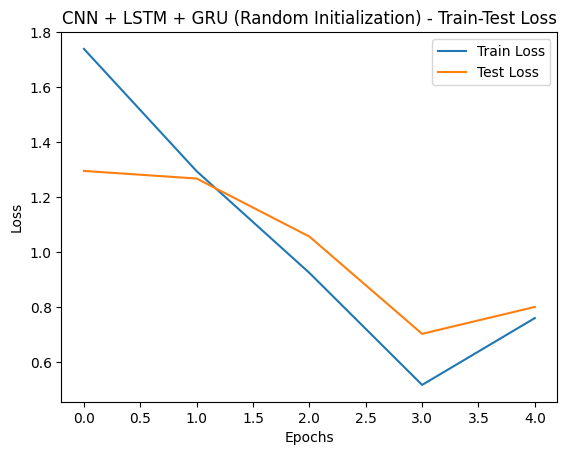

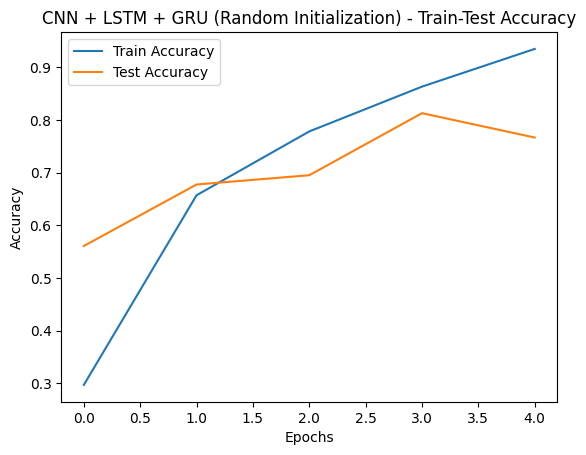

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 211ms/step - accuracy: 0.3343 - loss: 1.7037 - val_accuracy: 0.5672 - val_loss: 1.2815
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.5486 - loss: 1.2292 - val_accuracy: 0.6520 - val_loss: 1.1087
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - accuracy: 0.5958 - loss: 1.1576 - val_accuracy: 0.6828 - val_loss: 1.0047
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.6393 - loss: 1.4045 - val_accuracy: 0.7004 - val_loss: 0.9369
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 204ms/step - accuracy: 0.6937 - loss: 0.9219 - val_accuracy: 0.7247 - val_loss: 0.8871
Training CNN + LSTM + GRU (Word2Vec Embedding)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step
CNN + LSTM + GRU (Word2Vec Embedding) - Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.66      0.64       148
           1       0.78      0.63      0.70       127
           2       0.68      0.82      0.74       111


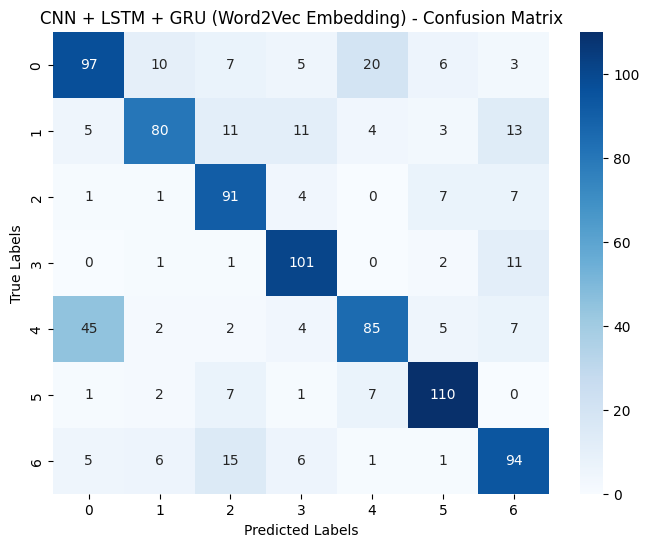

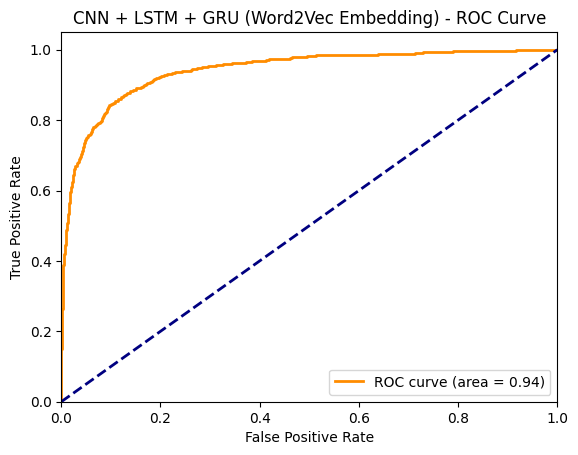

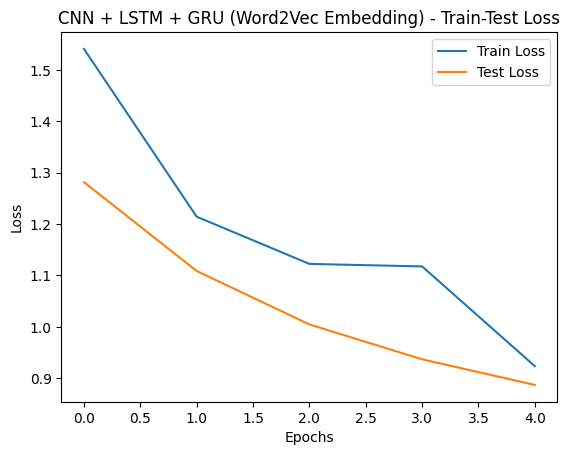

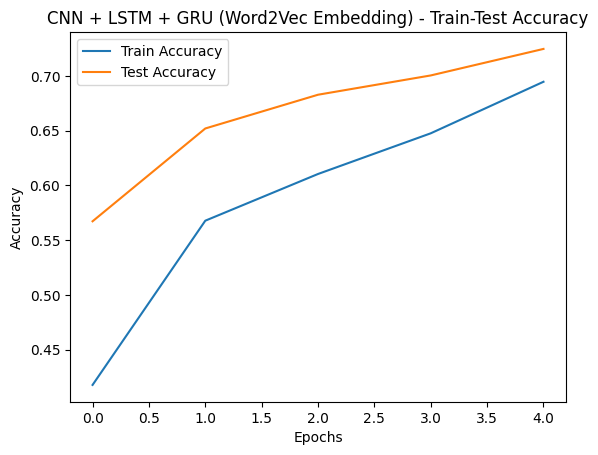

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 1: Random Initialization
def create_cnn_lstm_gru_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Word2Vec Embedding
def create_cnn_lstm_gru_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1: Random Initialization
model_random = create_cnn_lstm_gru_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_random, history_random, "CNN + LSTM + GRU (Random Initialization)")

# Model 2: Word2Vec Embedding
model_word2vec = create_cnn_lstm_gru_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_word2vec, history_word2vec, "CNN + LSTM + GRU (Word2Vec Embedding)")


In [ ]:
9

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x78c0a079c600>
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 272ms/step - accuracy: 0.1782 - loss: 1.9552 - val_accuracy: 0.4945 - val_loss: 1.6769
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 264ms/step - accuracy: 0.5955 - loss: 1.5605 - val_accuracy: 0.7775 - val_loss: 1.0142
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 279ms/step - accuracy: 0.8141 - loss: 0.6849 - val_accuracy: 0.8062 - val_loss: 0.8100
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 264ms/step - accuracy: 0.8928 - loss: 0.4171 - val_accuracy: 0.8205 - val_loss: 0.6757
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 262ms/step - accuracy: 0.9226 - loss: 0.3391 - val_accuracy: 0.8172 - val_loss: 0.6976
Training CNN + BiLSTM + GRU (Random Initialization)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step
CNN + BiLSTM + GRU (Random Initialization) - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       148
           1       0.85      0.59      0.70       127
           2       0.72      0.88      0.79 

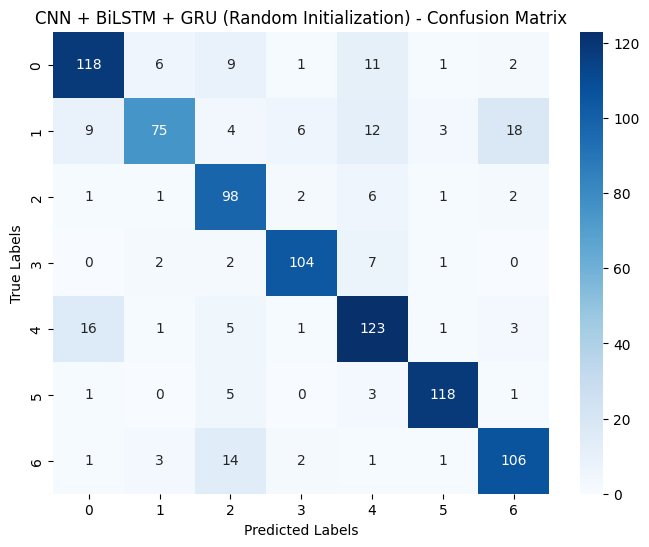

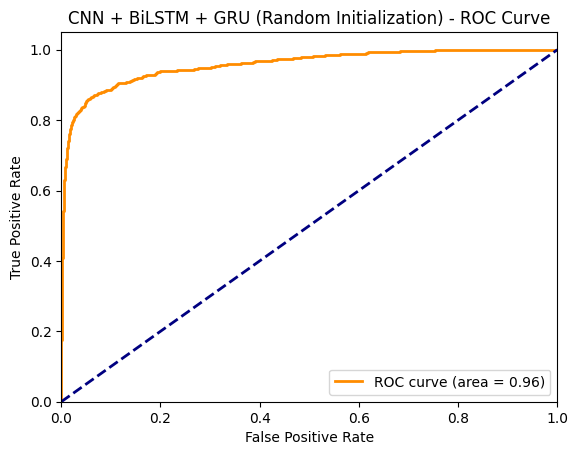

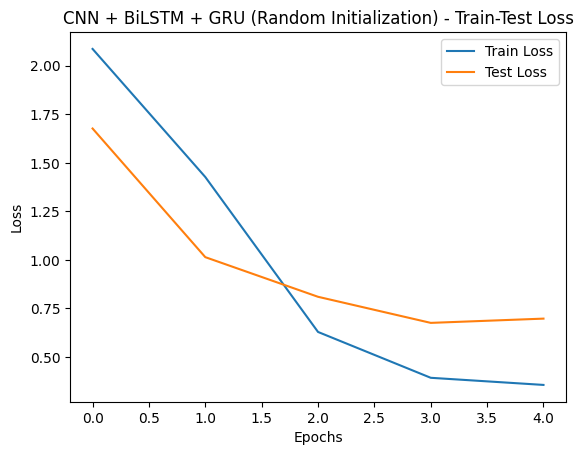

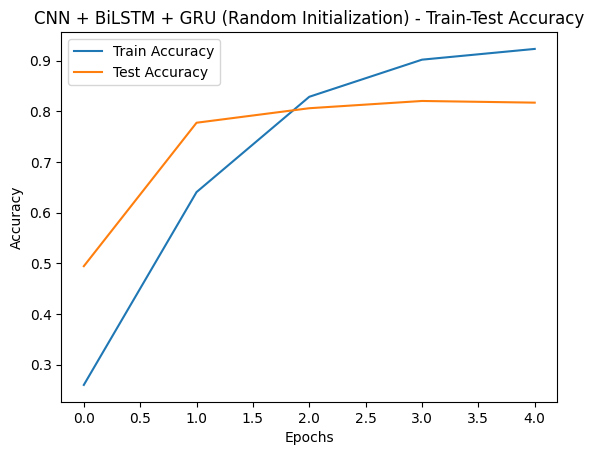

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 270ms/step - accuracy: 0.2283 - loss: 1.9789 - val_accuracy: 0.3513 - val_loss: 1.7763
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 264ms/step - accuracy: 0.3711 - loss: 1.6502 - val_accuracy: 0.5209 - val_loss: 1.3970
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 265ms/step - accuracy: 0.4882 - loss: 1.4110 - val_accuracy: 0.5606 - val_loss: 1.3177
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 283ms/step - accuracy: 0.5279 - loss: 1.2783 - val_accuracy: 0.6333 - val_loss: 1.1848
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 264ms/step - accuracy: 0.5764 - loss: 1.2616 - val_accuracy: 0.6608 - val_loss: 1.0962
Training CNN + BiLSTM + GRU (Word2Vec Embedding)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step
CNN + BiLSTM + GRU (Word2Vec Embedding) - Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.51      0.61       148
           1       0.47      0.65      0.54       127
           2       0.69      0.80      0.74       

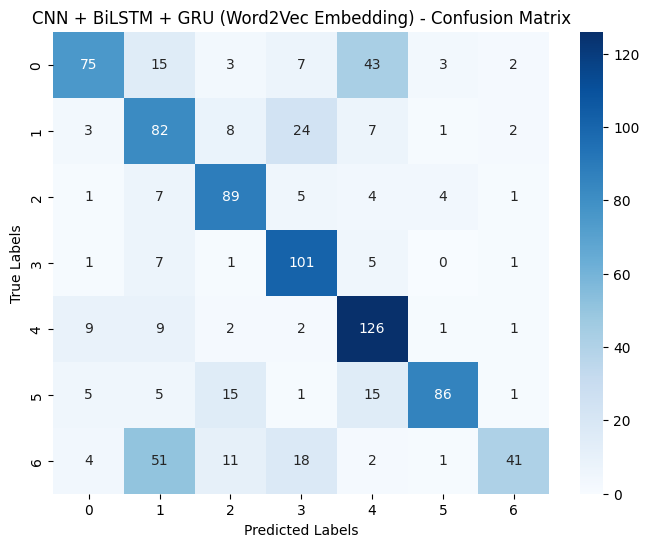

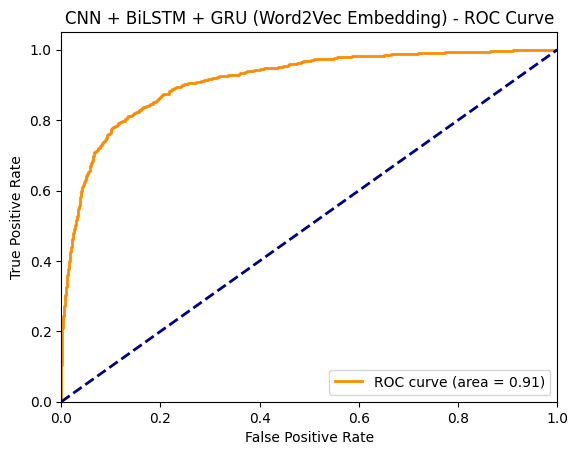

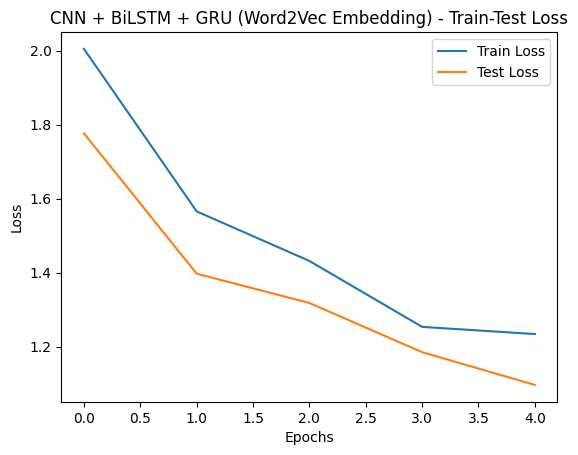

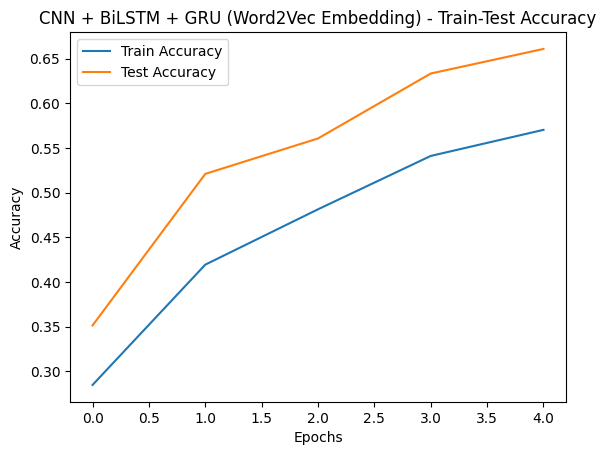

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 1: Random Initialization
def create_cnn_bilstm_gru_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Word2Vec Embedding
def create_cnn_bilstm_gru_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1: Random Initialization
model_random = create_cnn_bilstm_gru_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_random, history_random, "CNN + BiLSTM + GRU (Random Initialization)")

# Model 2: Word2Vec Embedding
model_word2vec = create_cnn_bilstm_gru_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_word2vec, history_word2vec, "CNN + BiLSTM + GRU (Word2Vec Embedding)")


In [ ]:
10

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x78c0701104c0>
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 49s 730ms/step - accuracy: 0.1988 - loss: 3.1124 - val_accuracy: 0.3855 - val_loss: 1.7578
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 81s 714ms/step - accuracy: 0.4326 - loss: 2.4484 - val_accuracy: 0.4824 - val_loss: 1.6167
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 716ms/step - accuracy: 0.5538 - loss: 2.1970 - val_accuracy: 0.4504 - val_loss: 1.6422
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 719ms/step - accuracy: 0.4482 - loss: 4.1413 - val_accuracy: 0.3216 - val_loss: 1.7495
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 715ms/step - accuracy: 0.4272 - loss: 1.5960 - val_accuracy: 0.4967 - val_loss: 1.6575
Training LSTM + BiLSTM + GRU (Random Initialization)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step
LSTM + BiLSTM + GRU (Random Initialization) - Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.45      0.51       148
           1       0.42      0.65      0.51       127
           2       0.37      0.88      0.

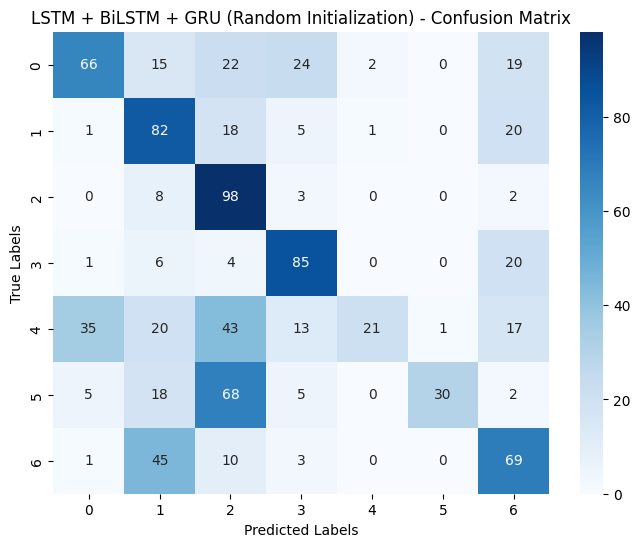

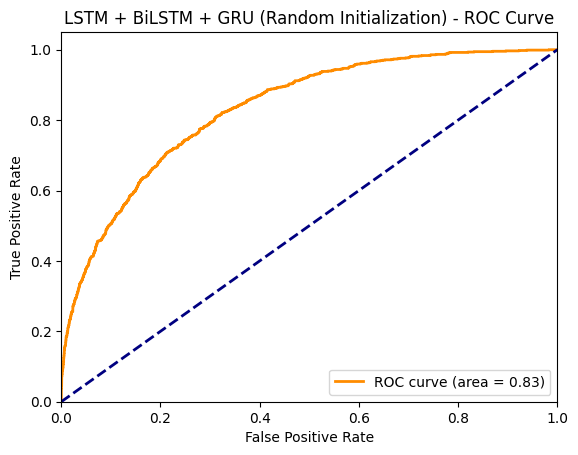

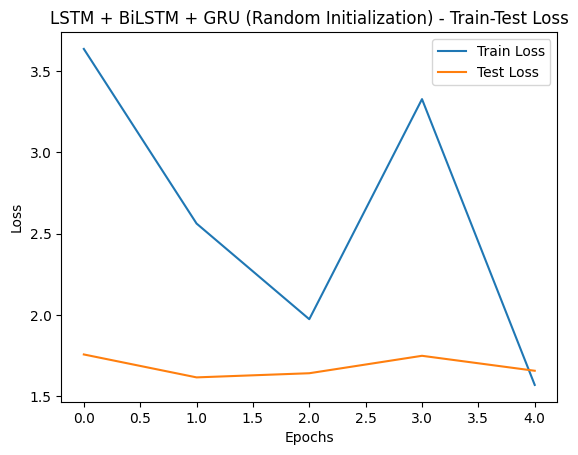

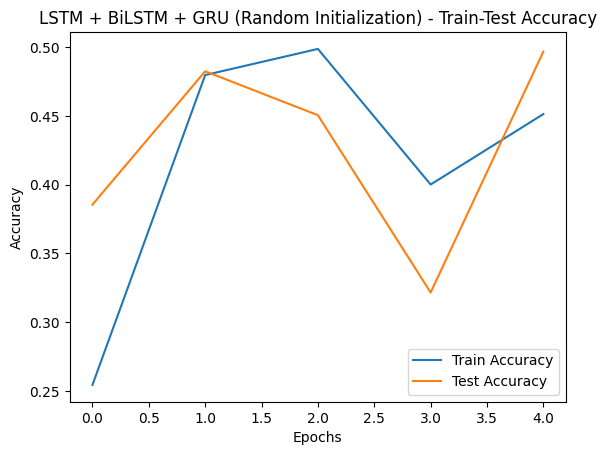

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 51s 750ms/step - accuracy: 0.2864 - loss: 17.0274 - val_accuracy: 0.4130 - val_loss: 1.6827
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 718ms/step - accuracy: 0.4062 - loss: 1.6542 - val_accuracy: 0.4879 - val_loss: 1.6281
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 82s 717ms/step - accuracy: 0.4637 - loss: 1.5939 - val_accuracy: 0.5231 - val_loss: 1.5680
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 721ms/step - accuracy: 0.4740 - loss: 1.5317 - val_accuracy: 0.5463 - val_loss: 1.5065
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 715ms/step - accuracy: 0.5163 - loss: 1.4394 - val_accuracy: 0.5661 - val_loss: 1.4373
Training LSTM + BiLSTM + GRU (Word2Vec Embedding)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step
LSTM + BiLSTM + GRU (Word2Vec Embedding) - Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       148
           1       0.50      0.60      0.54       127
           2       0.54      0.60      0.57   

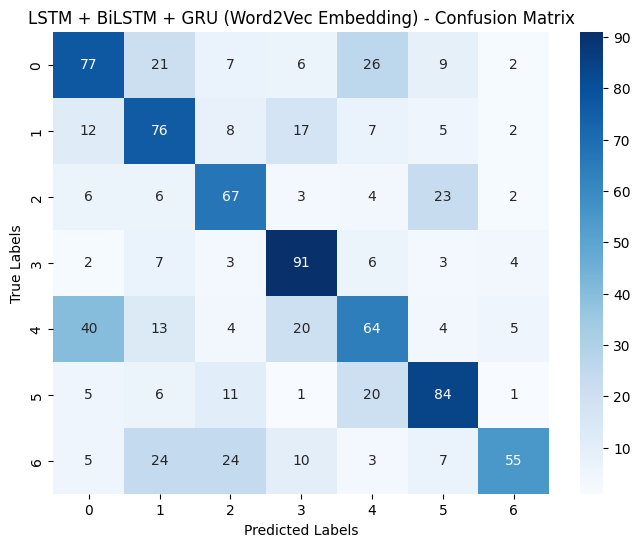

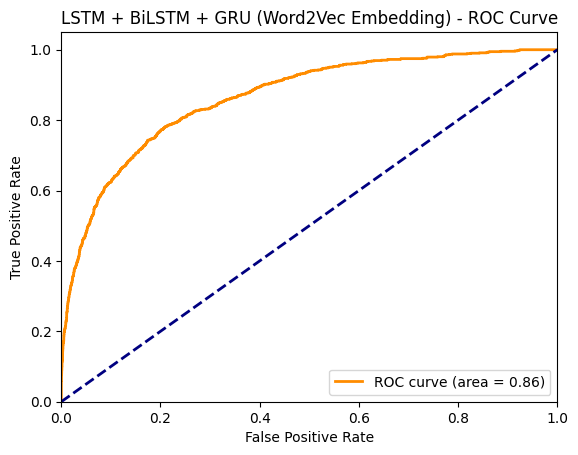

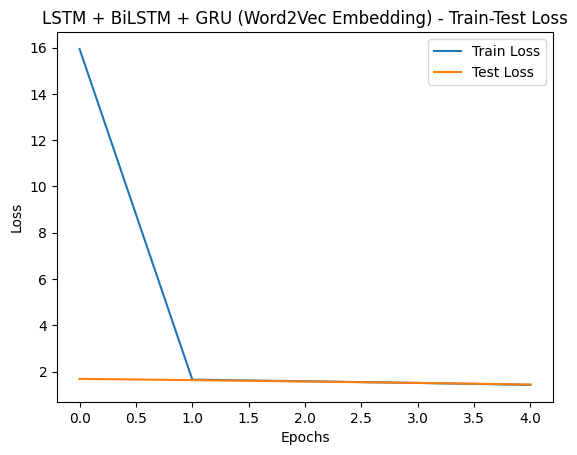

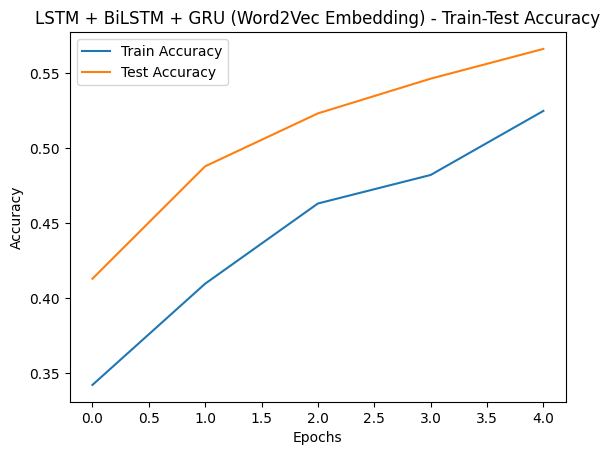

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 1: Random Initialization
def create_lstm_bilstm_gru_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Word2Vec Embedding
def create_lstm_bilstm_gru_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1: Random Initialization
model_random = create_lstm_bilstm_gru_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_random, history_random, "LSTM + BiLSTM + GRU (Random Initialization)")

# Model 2: Word2Vec Embedding
model_word2vec = create_lstm_bilstm_gru_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_word2vec, history_word2vec, "LSTM + BiLSTM + GRU (Word2Vec Embedding)")


In [ ]:
11

Using device: <tensorflow.python.eager.context._EagerDeviceContext object at 0x78c0a87d8dc0>
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 356ms/step - accuracy: 0.1954 - loss: 1.8860 - val_accuracy: 0.6156 - val_loss: 1.3210
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 345ms/step - accuracy: 0.5961 - loss: 1.5160 - val_accuracy: 0.7137 - val_loss: 0.9888
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 339ms/step - accuracy: 0.7704 - loss: 0.7525 - val_accuracy: 0.7555 - val_loss: 0.8817
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 340ms/step - accuracy: 0.8736 - loss: 0.5655 - val_accuracy: 0.7148 - val_loss: 0.9419
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 330ms/step - accuracy: 0.8602 - loss: 0.4595 - val_accuracy: 0.8172 - val_loss: 0.6577
Training CNN + LSTM + BiLSTM + GRU (Random Initialization)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step
CNN + LSTM + BiLSTM + GRU (Random Initialization) - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       148
           1       0.65      0.80      0.72       127
           2       0.83      0

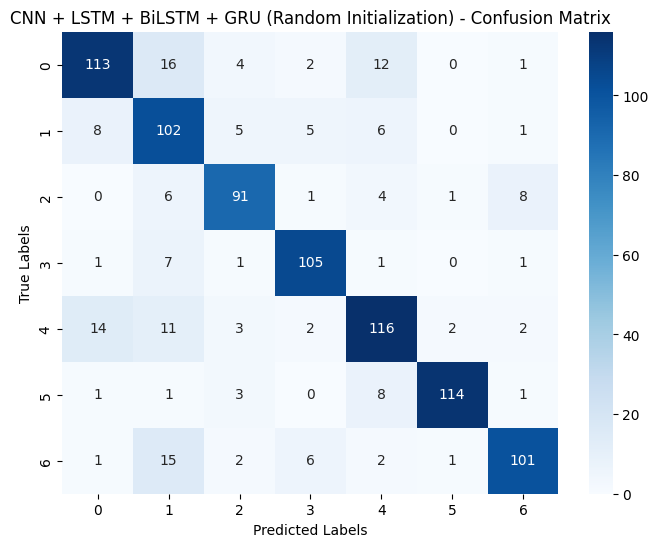

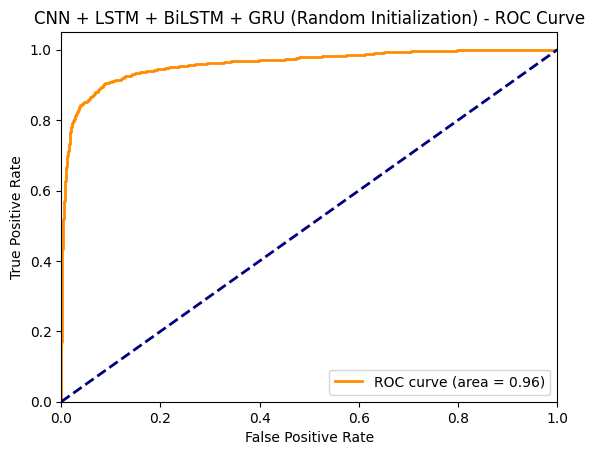

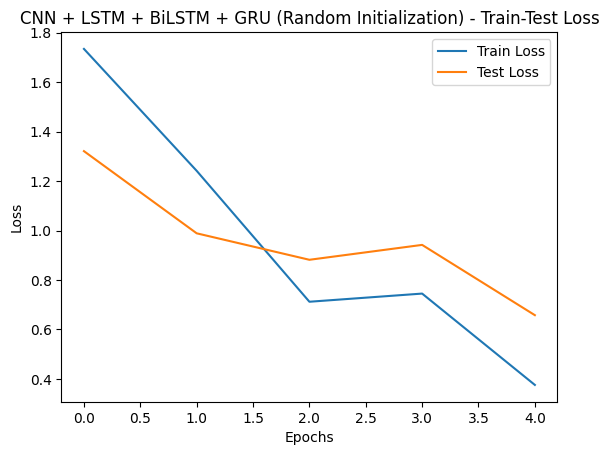

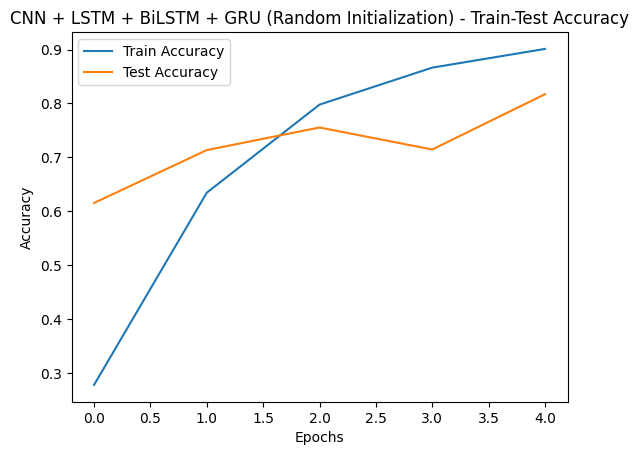

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 28s 350ms/step - accuracy: 0.3092 - loss: 1.7590 - val_accuracy: 0.5760 - val_loss: 1.4163
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 345ms/step - accuracy: 0.5172 - loss: 1.3569 - val_accuracy: 0.6024 - val_loss: 1.2531
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 328ms/step - accuracy: 0.5943 - loss: 1.1767 - val_accuracy: 0.6894 - val_loss: 1.0139
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 329ms/step - accuracy: 0.6630 - loss: 1.0618 - val_accuracy: 0.7214 - val_loss: 0.9068
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 347ms/step - accuracy: 0.7240 - loss: 0.8659 - val_accuracy: 0.7423 - val_loss: 0.8118
Training CNN + LSTM + BiLSTM + GRU (Word2Vec Embedding)...
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step
CNN + LSTM + BiLSTM + GRU (Word2Vec Embedding) - Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.51      0.61       148
           1       0.60      0.74      0.66       127
           2       0.73      0.82   

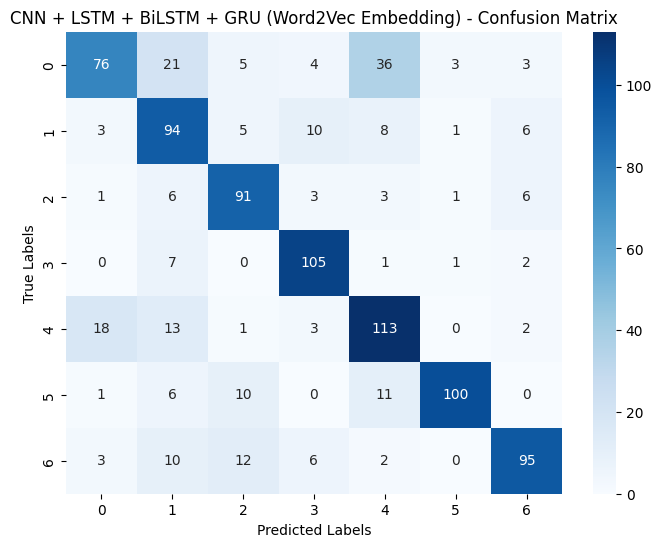

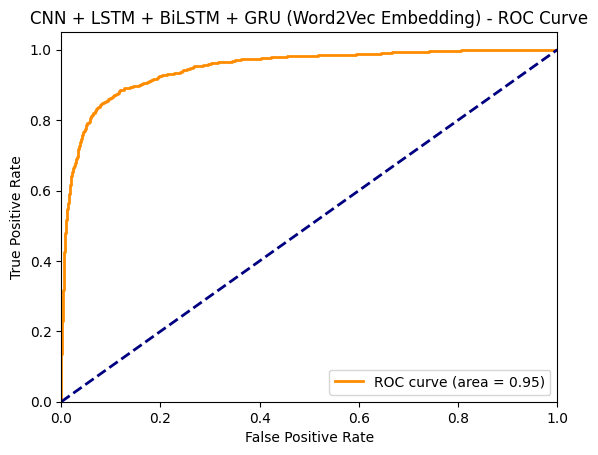

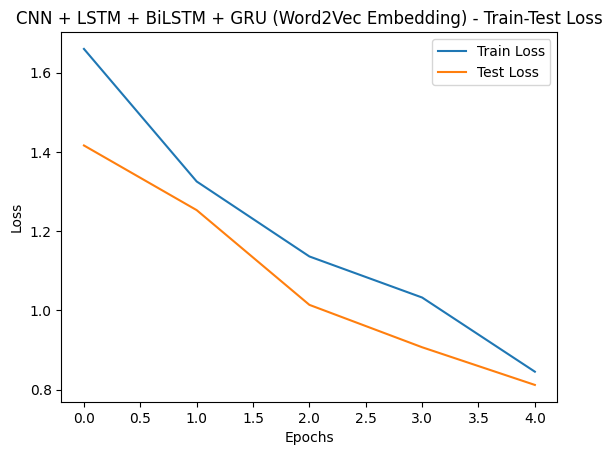

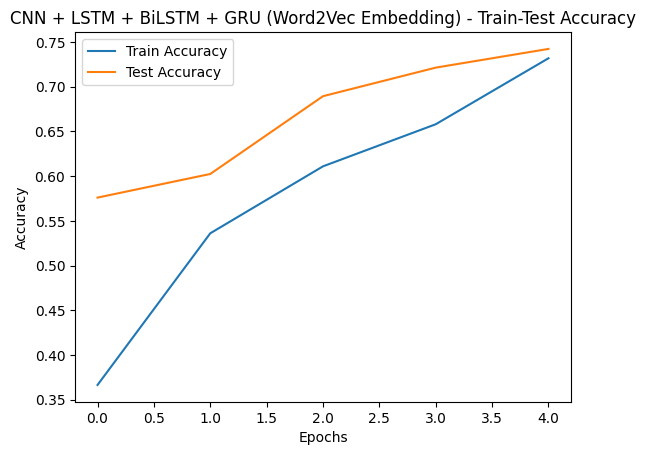

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

# GPU kullanımını kontrol et
device = tf.device('GPU' if tf.config.list_physical_devices('GPU') else 'CPU')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'zemberek_lem_dataset.csv'
df = pd.read_csv(file_path)

# 'Stanza Lemmas' sütununu metin olarak ve 'category' sütununu hedef olarak kullanacağız
X = df['Stanza Lemmas']
y = df['category']

# Kategorik veriyi sayısal hale getirme
y = y.astype('category').cat.codes

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer'ı uygulayalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal verilere dönüştürme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
max_len = 100  # Cümle uzunluğu (padding için)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Kategoriyi One-Hot Encoding formatına dönüştürme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Word2Vec modelini yükleyelim
word2vec_model_path = 'word2vec_model.model'  # Burada kendi kaydettiğiniz dosya yolunu girin
word2vec_model = Word2Vec.load(word2vec_model_path)

# Embedding matrisi oluşturuluyor
embedding_dim = 100  # Word2Vec modelinizin embedding boyutu
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Model 1: Random Initialization
def create_cnn_lstm_bilstm_gru_random_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Word2Vec Embedding
def create_cnn_lstm_bilstm_gru_word2vec_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # LSTM katmanı
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))  # BiLSTM katmanı
    model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))  # GRU katmanı
    model.add(Dense(7, activation='softmax'))  # 7 sınıf
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli eğitme ve test etme fonksiyonu
def evaluate_model(model, history, model_name):
    print(f"Training {model_name}...")
    # Test sonuçları
    y_pred = model.predict(X_test_pad)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    # Accuracy, Precision, Recall, F1-score
    acc = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC curve
    y_true_bin = label_binarize(y_true_labels, classes=np.arange(7))
    fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Loss and Accuracy plots
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} - Train-Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} - Train-Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Model 1: Random Initialization
model_random = create_cnn_lstm_bilstm_gru_random_model()
history_random = model_random.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_random, history_random, "CNN + LSTM + BiLSTM + GRU (Random Initialization)")

# Model 2: Word2Vec Embedding
model_word2vec = create_cnn_lstm_bilstm_gru_word2vec_model()
history_word2vec = model_word2vec.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))
evaluate_model(model_word2vec, history_word2vec, "CNN + LSTM + BiLSTM + GRU (Word2Vec Embedding)")
